In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

In [4]:
diamonds = pd.read_csv('diamonds_original.csv')

In [5]:
diamonds

carat  clarity  color  cut  depth  table     x     y     z   price
0       1.26        2      4    2   60.6   60.0  6.97  7.00  4.23  6546.0
1       0.80        3      4    4   62.1   54.0  5.96  5.99  3.71  3030.0
2       0.56        4      2    4   61.7   54.0  5.28  5.32  3.27  1915.0
3       1.51        3      6    1   64.0   58.0  7.24  7.27  4.64  6936.0
4       0.33        6      5    4   62.2   54.0  4.43  4.45  2.76   646.0
...      ...      ...    ...  ...    ...    ...   ...   ...   ...     ...
53935   1.02        2      4    2   62.9   59.0  6.38  6.41  4.02  4796.0
53936   0.93        2      4    3   61.8   59.0  6.27  6.23  3.86  3750.0
53937   0.30        4      5    4   62.4   54.0  4.30  4.32  2.69   491.0
53938   0.36        3      2    4   61.5   55.0  4.60  4.57  2.82   807.0
53939   0.70        1      2    2   60.7   58.0  5.73  5.77  3.49  2195.0

[53940 rows x 10 columns]

In [6]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])

In [7]:
s = pd.Series(classColumn)
diamonds.reset_index(inplace=True)
diamonds.drop('index', axis='columns', inplace=True)
diamonds['class'] = s
diamonds

carat  clarity  color  cut  depth  table     x     y     z   price  \
0       1.26        2      4    2   60.6   60.0  6.97  7.00  4.23  6546.0   
1       0.80        3      4    4   62.1   54.0  5.96  5.99  3.71  3030.0   
2       0.56        4      2    4   61.7   54.0  5.28  5.32  3.27  1915.0   
3       1.51        3      6    1   64.0   58.0  7.24  7.27  4.64  6936.0   
4       0.33        6      5    4   62.2   54.0  4.43  4.45  2.76   646.0   
...      ...      ...    ...  ...    ...    ...   ...   ...   ...     ...   
53935   1.02        2      4    2   62.9   59.0  6.38  6.41  4.02  4796.0   
53936   0.93        2      4    3   61.8   59.0  6.27  6.23  3.86  3750.0   
53937   0.30        4      5    4   62.4   54.0  4.30  4.32  2.69   491.0   
53938   0.36        3      2    4   61.5   55.0  4.60  4.57  2.82   807.0   
53939   0.70        1      2    2   60.7   58.0  5.73  5.77  3.49  2195.0   

               class  
0      (5000, 10000]  
1          [0, 5000]  
2          [0, 5000]  
3      (5000, 10000]  
4          [0, 5000]  
...              ...  
53935      [0, 5000]  
53936      [0, 5000]  
53937      [0, 5000]  
53938      [0, 5000]  
53939      [0, 5000]  

[53940 rows x 11 columns]

In [8]:
feature_names = ['carat', 'price']

In [9]:
X = diamonds[feature_names]
X

carat   price
0       1.26  6546.0
1       0.80  3030.0
2       0.56  1915.0
3       1.51  6936.0
4       0.33   646.0
...      ...     ...
53935   1.02  4796.0
53936   0.93  3750.0
53937   0.30   491.0
53938   0.36   807.0
53939   0.70  2195.0

[53940 rows x 2 columns]

In [10]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
53935        [0, 5000]
53936        [0, 5000]
53937        [0, 5000]
53938        [0, 5000]
53939        [0, 5000]
Name: class, Length: 53940, dtype: object

In [11]:
undersampler = RandomUnderSampler(random_state = 42)

In [12]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [13]:
X_undersampled

carat    price
0      1.54  11795.0
1      2.45  11830.0
2      1.14  10878.0
3      1.30  12932.0
4      1.52  11206.0
...     ...      ...
6615   0.91   3936.0
6616   0.70   1966.0
6617   0.30    665.0
6618   0.43    792.0
6619   0.37    839.0

[6620 rows x 2 columns]

In [14]:
X = X_undersampled
X

carat    price
0      1.54  11795.0
1      2.45  11830.0
2      1.14  10878.0
3      1.30  12932.0
4      1.52  11206.0
...     ...      ...
6615   0.91   3936.0
6616   0.70   1966.0
6617   0.30    665.0
6618   0.43    792.0
6619   0.37    839.0

[6620 rows x 2 columns]

In [15]:
y_undersampled.value_counts()

(10000, 15000]    1655
(5000, 10000]     1655
15000+            1655
[0, 5000]         1655
Name: class, dtype: int64

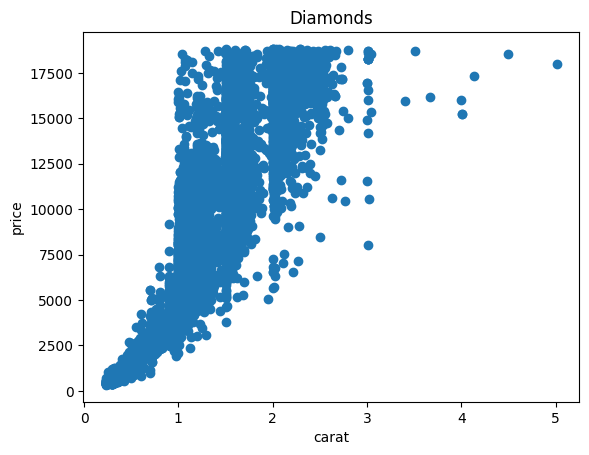

In [16]:
plt.scatter(X['carat'], X['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title("Diamonds")
plt.show()

In [17]:
scaler = MinMaxScaler()

In [18]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

carat     price
0     0.274059  0.620046
1     0.464435  0.621939
2     0.190377  0.570471
3     0.223849  0.681516
4     0.269874  0.588203
...        ...       ...
6615  0.142259  0.195167
6616  0.098326  0.088663
6617  0.014644  0.018327
6618  0.041841  0.025193
6619  0.029289  0.027734

[6620 rows x 2 columns]

***

Pomocne funkcije za izvestaj o modelu

In [19]:
def plot_search(X):
  ks = range(2, 30)
  linkages = ['single', 'complete', 'average']
  fig = plt.figure(figsize=(15, 150))
  idx = 1
  silhouette = []
  for k in ks:
    for linkage in linkages:
      model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
      model.fit(X)
      if linkage == 'average':
        silhouette.append(silhouette_score(X, model.labels_))

      fig.add_subplot(len(ks), len(linkages), idx)
      idx += 1
      for cluster_label in range(k):
        cluster = X_undersampled[model.labels_ == cluster_label]
        plt.scatter(cluster['carat'], cluster['price'], label=f'cluster {cluster_label}')
      plt.title(f'k={k}, linkage={linkage}, s={silhouette_score(X, model.labels_):.4f}')

  plt.tight_layout()

  return silhouette


## AgglomerativeClustering

In [20]:
agg = AgglomerativeClustering(n_clusters = 2)

In [21]:
agg.fit(X)

AgglomerativeClustering()

In [22]:
children = pd.DataFrame(agg.children_)
children

0      1
0         0    519
1       479   1008
2      1533   6621
3       635   1455
4        23   1529
...     ...    ...
6614  13224  13232
6615  13228  13229
6616  13233  13234
6617  13231  13235
6618  13236  13237

[6619 rows x 2 columns]

In [23]:
clustered_data = X.copy()
clustered_data['cluster'] = agg.labels_
clustered_data

carat     price  cluster
0     0.274059  0.620046        1
1     0.464435  0.621939        1
2     0.190377  0.570471        1
3     0.223849  0.681516        1
4     0.269874  0.588203        1
...        ...       ...      ...
6615  0.142259  0.195167        0
6616  0.098326  0.088663        0
6617  0.014644  0.018327        0
6618  0.041841  0.025193        0
6619  0.029289  0.027734        0

[6620 rows x 3 columns]

In [24]:
clustered_data['cluster'].value_counts()

1    3361
0    3259
Name: cluster, dtype: int64

In [25]:
silhouette_score(X, agg.labels_)

0.6187339617082942

In [26]:
silhouette_values = silhouette_samples(X, agg.labels_)
silhouette_values

array([0.55156105, 0.53534499, 0.30656416, ..., 0.70961042, 0.72090825,
       0.71966372])

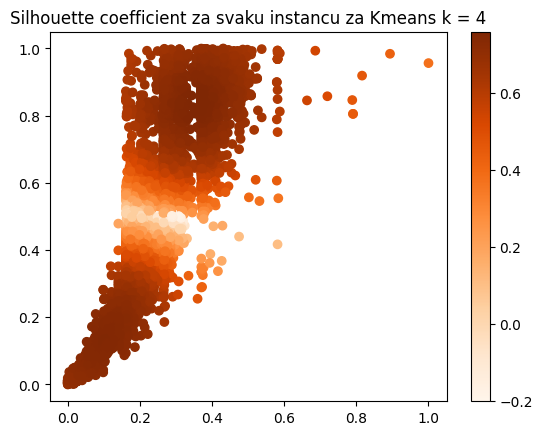

In [27]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Oranges")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 4")
plt.show()

***

Trazenje najboljeg k 

In [28]:
ks = range(2, 30)

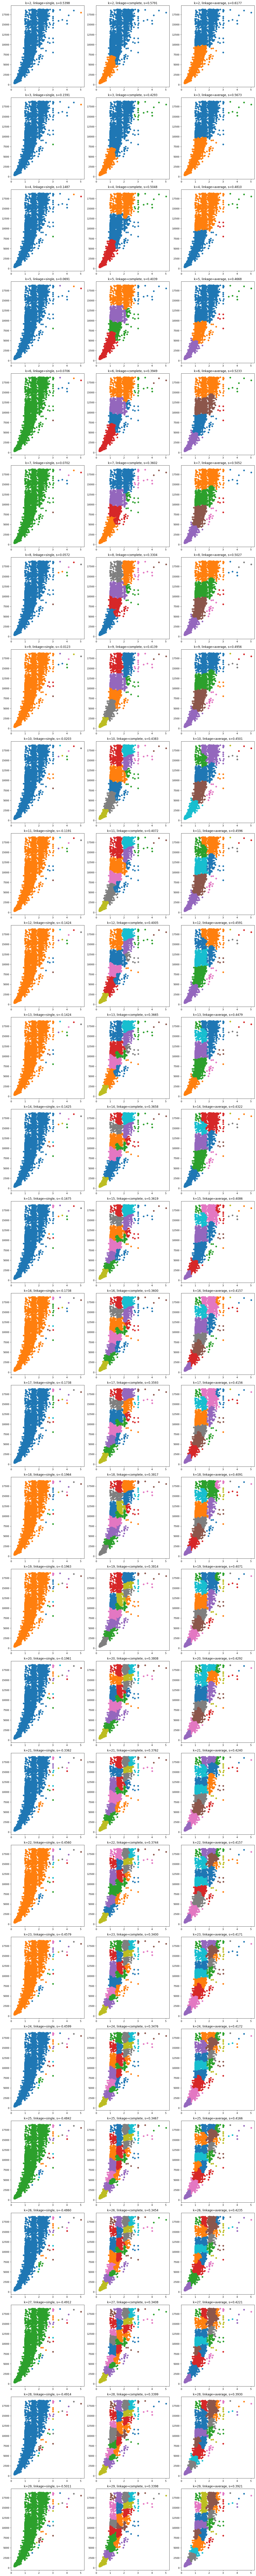

In [29]:
silhouette = plot_search(X)

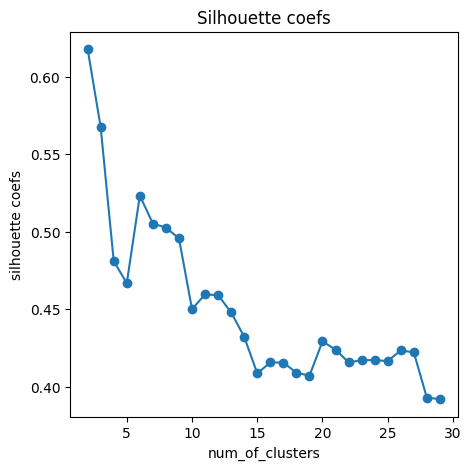

In [30]:
plt.figure(figsize=(5,5))
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6177384361729406
For n_clusters = 3 The average silhouette_score is : 0.5673100783351712
For n_clusters = 4 The average silhouette_score is : 0.48101003592421276
For n_clusters = 5 The average silhouette_score is : 0.46681985381476565
For n_clusters = 6 The average silhouette_score is : 0.5232668825783652
For n_clusters = 7 The average silhouette_score is : 0.5051722591211735
For n_clusters = 8 The average silhouette_score is : 0.5026856688219143


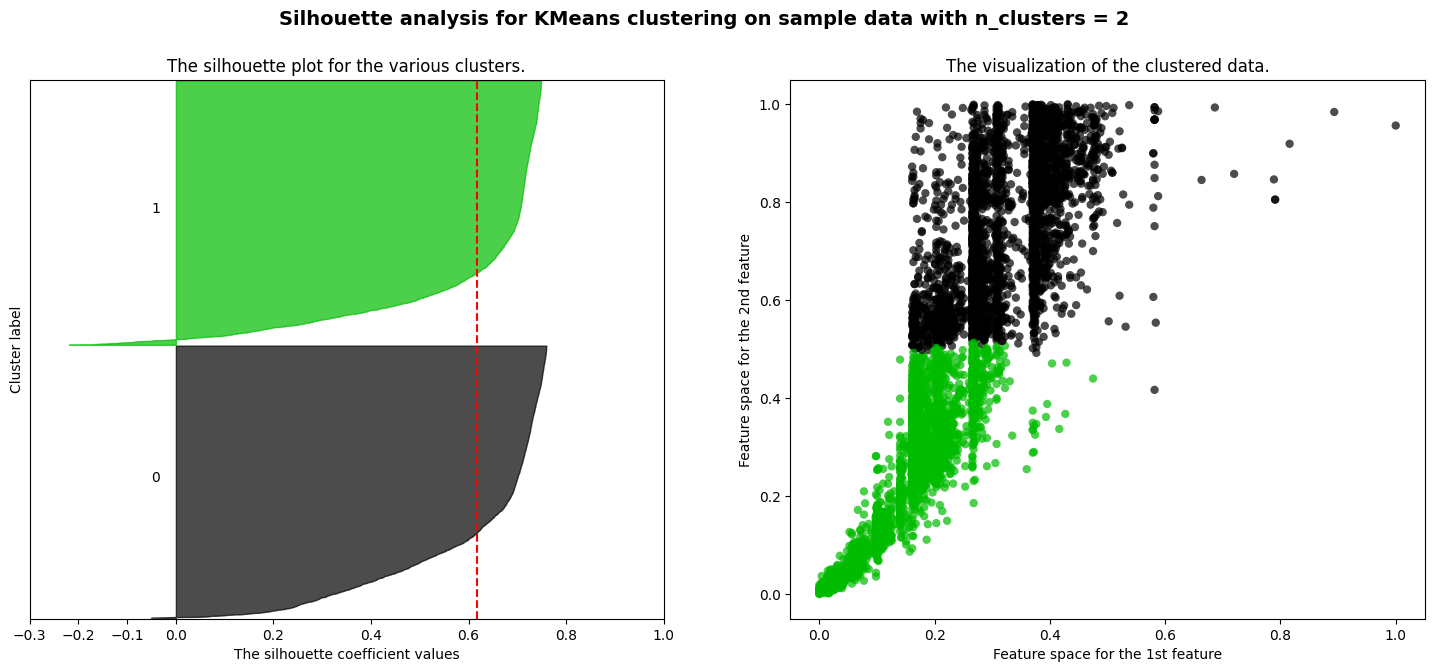

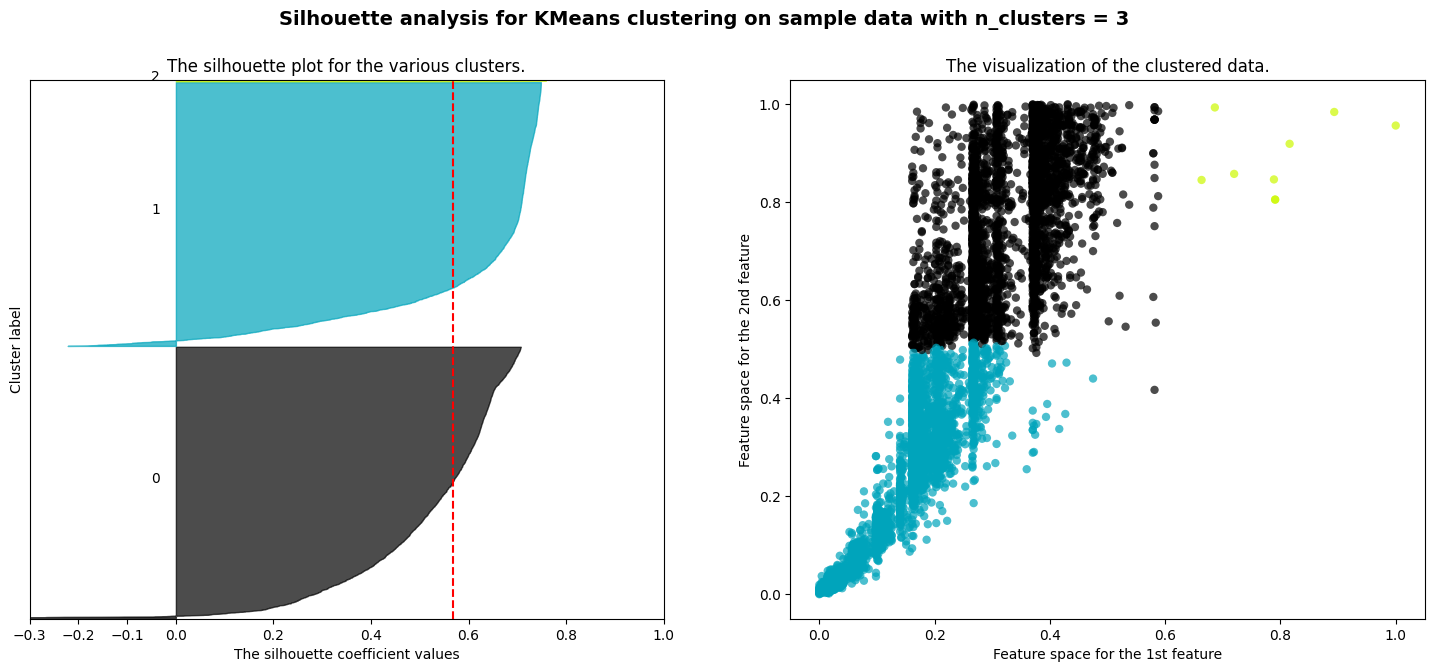

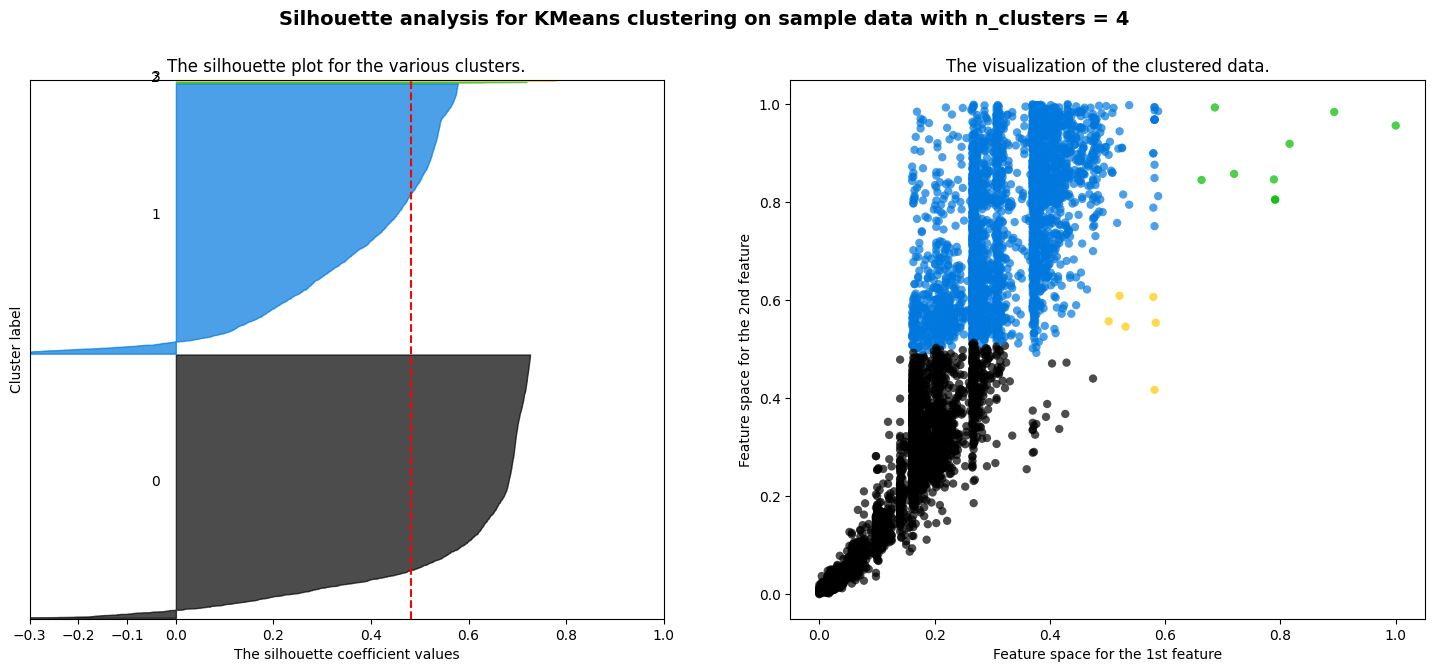

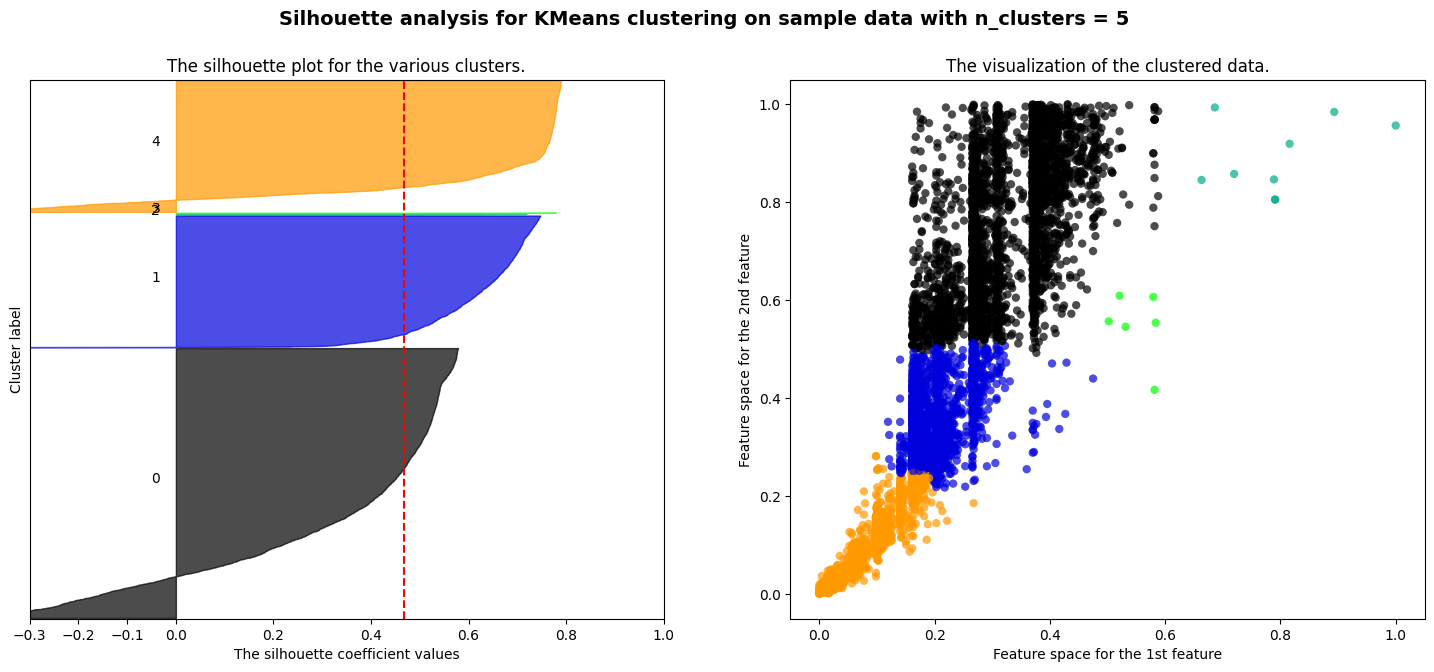

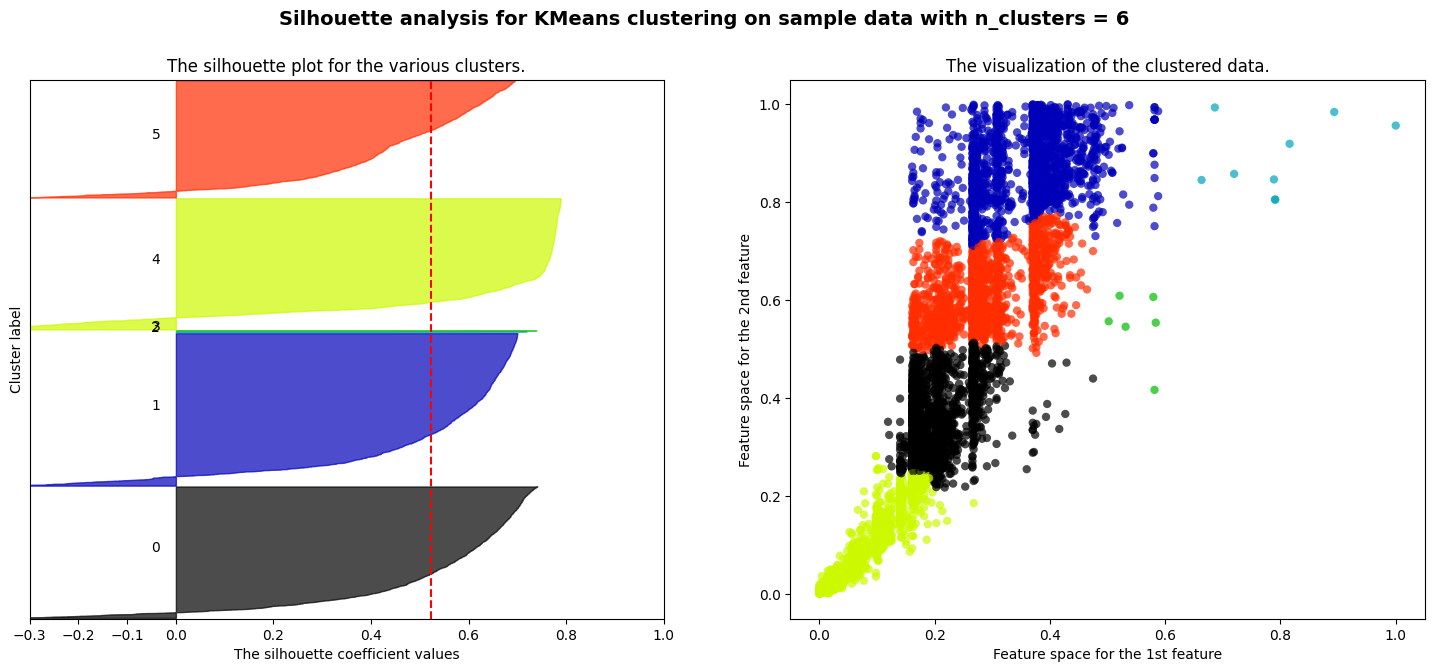

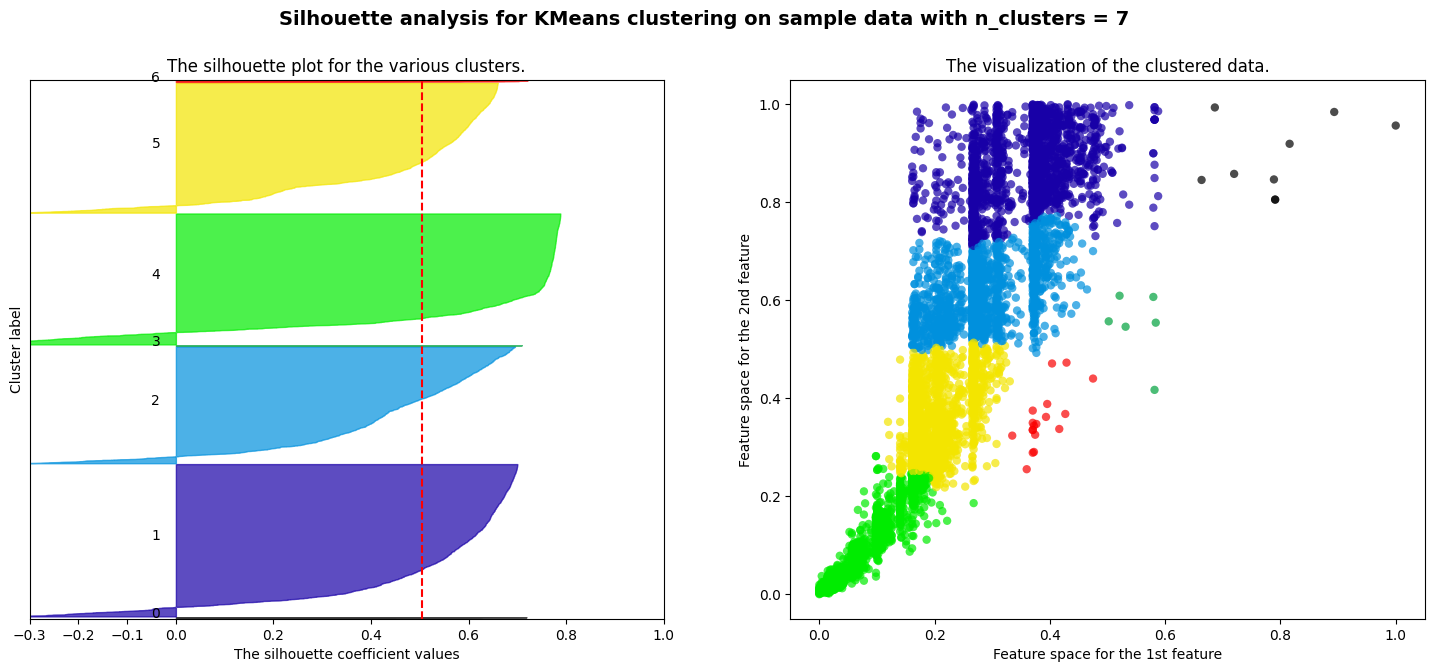

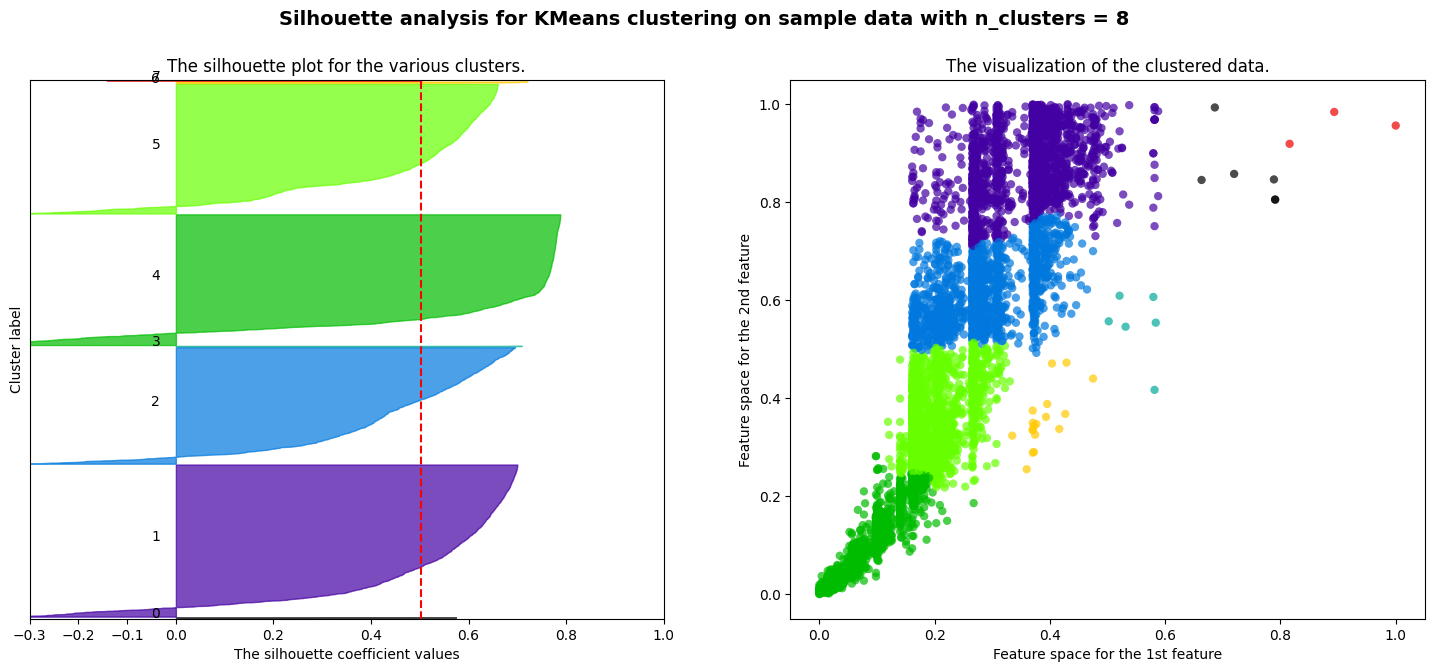

In [31]:
# pomoćna funkcija za silhouette diagram plot (preuzeto sa https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5, 6, 7, 8]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['carat'], X['price'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Najvisi **silhouette_score** imamo za 2 klastera.  
Za n=3 on opada ali je rezultat poprilicno dobar 
Za n=4 i n=5 dalje opada ali se za n=6 podize malo i daje zadovoljavajuce rezultate.  
Nadalje opada

Izabrali bismo model sa **n=3** ili **n=6**

In [32]:
model = AgglomerativeClustering(n_clusters = 6, linkage='average')

In [33]:
model.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [34]:
silhouette_values = silhouette_samples(X, model.labels_)
silhouette_values

array([ 0.68911022, -0.3706743 ,  0.45416765, ...,  0.7706011 ,
        0.78254815,  0.78548745])

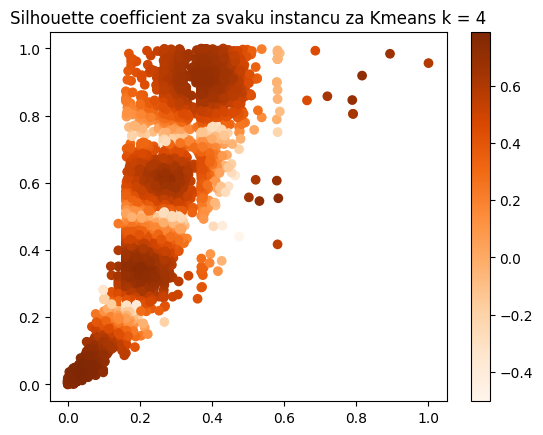

In [35]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Oranges")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu za Kmeans k = 4")
plt.show()

In [38]:
z = linkage(X, method='average')
z

array([[0.00000000e+00, 5.19000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.79000000e+02, 1.00800000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.53300000e+03, 6.62100000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.32280000e+04, 1.32340000e+04, 3.44507419e-01, 3.35100000e+03],
       [1.32320000e+04, 1.32360000e+04, 5.07330777e-01, 3.36000000e+03],
       [1.32350000e+04, 1.32370000e+04, 5.84563959e-01, 6.62000000e+03]])

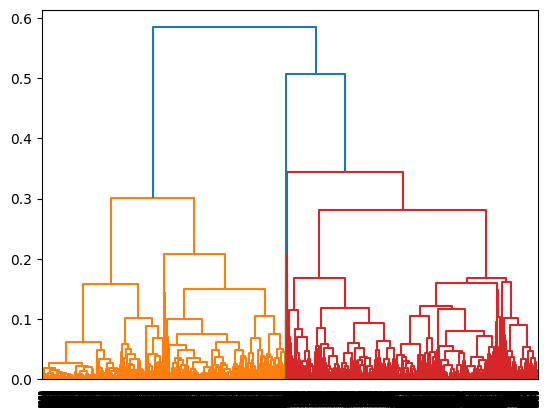

In [39]:
_ = dendrogram(z)

In [36]:
joblib.dump(model, 'AGGC.pkl')

['AGGC.pkl']